In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from datetime import datetime

In [124]:
bg_data = pd.read_csv(r'data\sipm_spectroscopy\vp2ps_20250324-095000.csv')
cobalt_data = pd.read_csv(r'data\sipm_spectroscopy\vp2ps_20250323-150545_co60_18h.csv')
bg_data['mV'] = bg_data['V']*1000
cobalt_data['mV'] = cobalt_data['V']*1000

bg_data['t'] = [datetime.fromtimestamp(x) for x in bg_data['t']]
cobalt_data['t'] = [datetime.fromtimestamp(x) for x in cobalt_data['t']]

cobalt_measurement_time = (cobalt_data['t'].iloc[-1] - cobalt_data['t'].iloc[0]).seconds
bg_measurement_time = (bg_data['t'].iloc[-1] - bg_data['t'].iloc[0]).seconds

print(f'Background measurement time: {bg_measurement_time} s')
print(f'Cobalt measurement time: {cobalt_measurement_time} s')

Background measurement time: 295 s
Cobalt measurement time: 37794 s


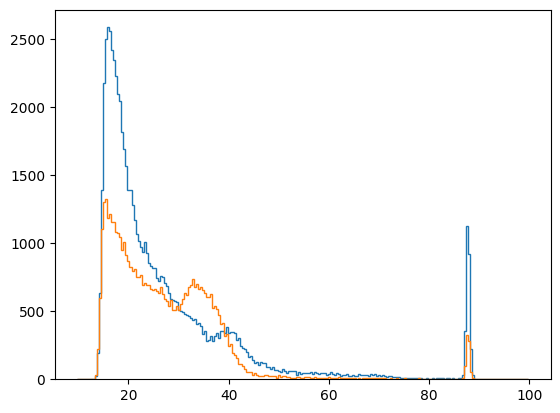

In [125]:
bins = np.arange(10-0.2,100+0.2, 0.4)
bg_count, bins, _ = plt.hist(bg_data['mV'], bins= bins, histtype='step')
co_count, _, _ = plt.hist(cobalt_data['mV'], bins = bins, histtype='step')
plt.show()

bin_centers = (bins[:-1] + bins[1:])/2

C:\Users\tobif\AppData\Local\Temp\ipykernel_17480\3267040152.py:2: RuntimeWarning: invalid value encountered in divide
  ax.step(bin_centers, co_count/bg_count, color = 'black')


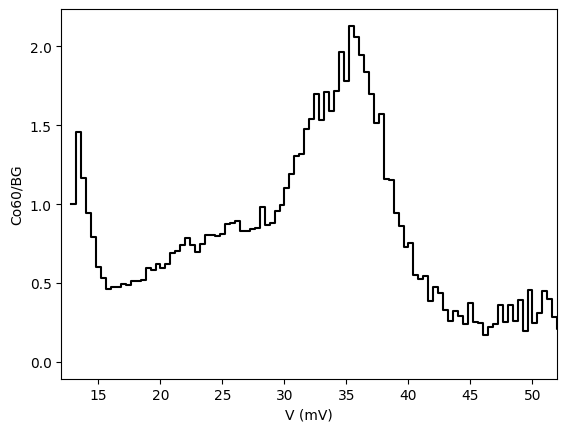

In [126]:
fig, ax = plt.subplots()
ax.step(bin_centers, co_count/bg_count, color = 'black')
# set x range from 0 to 40
ax.set_ylabel('Co60/BG')
ax.set_xlabel('V (mV)')
ax.set_xlim(12,52)
plt.show()


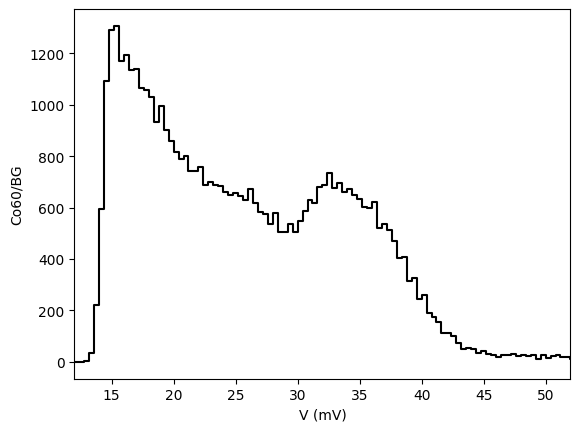

In [ ]:
fig,ax = plt.subplots()

ax.step(bin_centers, co_count - bg_count*bg_measurement_time/cobalt_measurement_time , color = 'black')
ax.set_ylabel('Co60 - BG')
ax.set_xlabel('V (mV)')
ax.set_xlim(12,52)

plt.show()